In [28]:
import os
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score
import seaborn as sns

In [17]:
data_path = os.getcwd()+"\\nse_data\\HISTORICAL_DATA\\"

In [18]:
data_path

'E:\\python\\learn\\learn_ml\\sklearn\\budget\\nse_data\\HISTORICAL_DATA\\'

In [24]:
df = pd.read_csv(data_path+'AARTIIND'+'_data.csv')

In [25]:
df.head()

,Date,open,high,low,close,adj_close,volume
0,2002-07-01,10.83,11.85,10.83,11.74,2.594959,3000.0
1,2002-07-02,12.50,12.50,11.42,11.59,2.561802,2345.0
2,2002-07-03,11.34,11.67,11.34,11.57,2.557382,1885.0
3,2002-07-04,11.15,11.47,11.15,11.20,2.475599,1145.0
4,2002-07-05,11.08,11.49,11.08,11.28,2.493282,1250.0


In [29]:
def any_stock(stock_name, today_value=None):
    '''function to predict any stock values
    stock_name == str; today_value= list,[open,high,low]
    '''
    df = pd.read_csv(data_path+'AARTIIND'+'_data.csv')
    df.fillna(df.mean(),inplace=True)
    X = df.iloc[:,[1,2,3]]
    y = df.iloc[:,[4]]
    sns.pairplot(x_vars=['open','high','low'], y_vars='close', data=df, height=7, aspect=0.7)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
    reg = linear_model.LinearRegression()
    reg.fit(X_train,y_train)
    print(f"score = {(reg.score(X_test, y_test))*100}")
    y_pred = reg.predict(X_test)
    print(f'median_absolute_error ====== {median_absolute_error(y_test,y_pred)}')
    print(f'mean absoulte error ======= {mean_absolute_error(y_test,y_pred)}')
    print(f'r2 score ========== {r2_score(y_test,y_pred)}')
    if today_value != None:
        y_today = reg.predict([today_value])
        print(f"predicted closing price is = {y_today}")

score = 99.9896686968697
median_absolute_error ====== 0.49324976024125533
mean absoulte error ======= 1.7171969655027282
r2 score ========== 0.9998966869686969


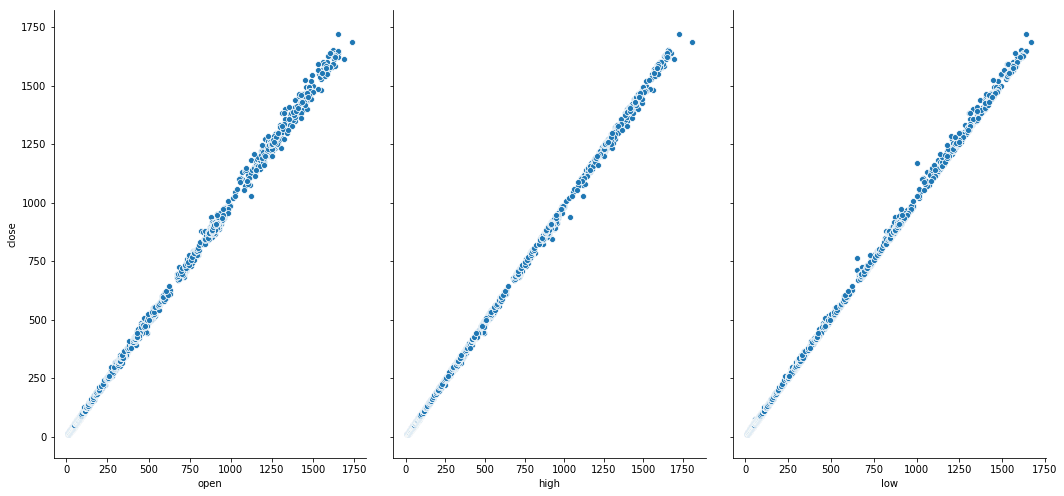

In [30]:
any_stock('AARTIIND')